# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NYC Staten Island - Data Processing

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
from pandas import DataFrame

## 1. Data Cleaning

In [2]:
island = pd.read_csv('island_addr2.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Drop attributes
- cmplnt_num
- cmplnt_fr_dt
- cmplnt_fr_tm
- crm_atpt_cptd_cd
- boro_nm
- parks_nm
- Number
- City
- State
- Country

In [3]:
attributes_to_drop = ['cmplnt_num', 'cmplnt_fr_dt', 'crm_atpt_cptd_cd', 'cmplnt_fr_tm', 'boro_nm', 
                      'parks_nm','Number', 'City', 'State', 'Country']
df = island.drop(attributes_to_drop, axis = 1)
df = df.dropna(subset=['Zip'])

In [4]:
print(df.groupby('Zip').count().index)

Float64Index([10013.0, 10301.0, 10302.0, 10303.0, 10304.0, 10305.0, 10306.0,
              10307.0, 10308.0, 10309.0, 10310.0, 10312.0, 10314.0, 10454.0,
              11101.0, 11103.0, 11212.0, 11213.0, 11220.0, 11224.0, 11370.0,
              11373.0, 11434.0, 11693.0],
             dtype='float64', name='Zip')


In [5]:
# Treat mixed data type in "Zip" column
df = df.astype({"Zip": int})
df = df.astype({"Zip": str})

In [6]:
print(df.groupby('Zip').count().index)

Index(['10013', '10301', '10302', '10303', '10304', '10305', '10306', '10307',
       '10308', '10309', '10310', '10312', '10314', '10454', '11101', '11103',
       '11212', '11213', '11220', '11224', '11370', '11373', '11434', '11693'],
      dtype='object', name='Zip')


In [7]:
# Staten Island zip 10301 ~ 10314
index_to_remove = [x for x in df.groupby('Zip').count().index if (x < '10301') or (x > '10314') ]

# Slice dataframe
for zipcode in index_to_remove:
    df = df[df["Zip"] != zipcode]

In [8]:
len(df['Zip'].unique())

12

In [9]:
island_zip = list(df['Zip'].unique())
island_zip.sort()
print(island_zip)

['10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10312', '10314']


## Law category
- "Felony" means an offense for which a sentence to a term of imprisonment in excess of one year may be imposed.
- "Misdemeanor" means an offense, other than a "traffic infraction, " for which a sentence to a term of imprisonment in excess of fifteen days may be imposed, but for which a sentence to a term of imprisonment in excess of one year cannot be imposed.
- "Violation" means an offense, other than a "traffic infraction", for which a sentence to a term of imprisonment in excess of fifteen days cannot be imposed.

In [10]:
df['law_cat_cd'].unique()

array(['FELONY', 'MISDEMEANOR', 'VIOLATION'], dtype=object)

## Offense description

### Rows to remove: ofns description total count < 1000

In [11]:
df['ofns_desc'].value_counts()[17:]

FRAUDS                                  1021
VEHICLE AND TRAFFIC LAWS                 842
CRIMINAL TRESPASS                        671
FORGERY                                  472
UNAUTHORIZED USE OF A VEHICLE            391
POSSESSION OF STOLEN PROPERTY            313
OFFENSES AGAINST THE PERSON              252
RAPE                                     243
OTHER OFFENSES RELATED TO THEF           242
OFFENSES INVOLVING FRAUD                 228
ADMINISTRATIVE CODE                      220
NYS LAWS-UNCLASSIFIED FELONY             208
ARSON                                    163
OTHER STATE LAWS (NON PENAL LA            83
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      43
OFFENSES AGAINST PUBLIC SAFETY            27
KIDNAPPING & RELATED OFFENSES             21
DISORDERLY CONDUCT                        20
BURGLAR'S TOOLS                           14
PETIT LARCENY OF MOTOR VEHICLE             8
ENDAN WELFARE INCOMP                       8
CHILD ABANDONMENT/NON SUPPORT              5
HOMICIDE-N

In [12]:
index_to_remove = list(df['ofns_desc'].value_counts()[18:].index)
print(index_to_remove)

['VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS', 'FORGERY', 'UNAUTHORIZED USE OF A VEHICLE', 'POSSESSION OF STOLEN PROPERTY', 'OFFENSES AGAINST THE PERSON', 'RAPE', 'OTHER OFFENSES RELATED TO THEF', 'OFFENSES INVOLVING FRAUD', 'ADMINISTRATIVE CODE', 'NYS LAWS-UNCLASSIFIED FELONY', 'ARSON', 'OTHER STATE LAWS (NON PENAL LA', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'OFFENSES AGAINST PUBLIC SAFETY', 'KIDNAPPING & RELATED OFFENSES', 'DISORDERLY CONDUCT', "BURGLAR'S TOOLS", 'PETIT LARCENY OF MOTOR VEHICLE', 'ENDAN WELFARE INCOMP', 'CHILD ABANDONMENT/NON SUPPORT', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'KIDNAPPING', 'FELONY SEX CRIMES', 'PROSTITUTION & RELATED OFFENSES', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'INTOXICATED/IMPAIRED DRIVING', 'OFFENSES RELATED TO CHILDREN', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'DISRUPTION OF A RELIGIOUS SERV', 'LOITERING/GAMBLING (CARDS, DIC', 'FRAUDULENT ACCOSTING', 'HOMICIDE-NEGLIGENT-VEHICLE', 'ESCAPE 3', 'GAMBLING', 'OTHER STATE LAWS']


In [13]:
# Slice dataframe
for desc in index_to_remove:
    df = df[df["ofns_desc"] != desc]
len(df["ofns_desc"].value_counts())

18

In [14]:
df.shape

(93927, 21)

## Queens data (queens_df.csv)
- Zip code cleaning
- Offense description cleaning

In [15]:
# Write to a csv file
df.to_csv("df_island.csv", index = False)

## 2. EDA

## Crime distribution by zip code

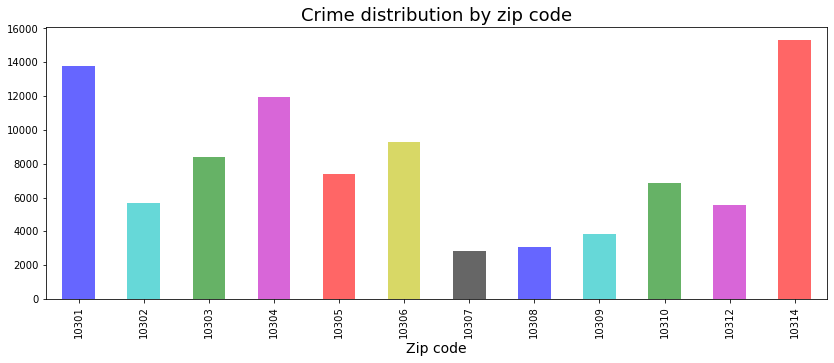

In [16]:
# Zip-code
fig = plt.figure(figsize = (14,5))
_ = df['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Crime distribution by zip code", fontsize=18)
_ = plt.xlabel('Zip code', fontsize = 14)

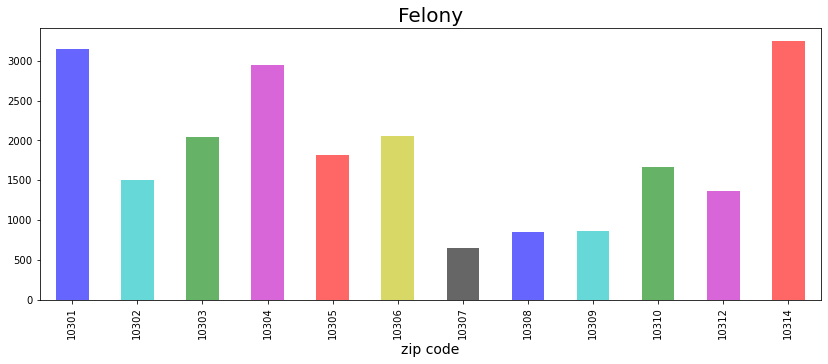

In [17]:
# Felony by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='FELONY']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Felony",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

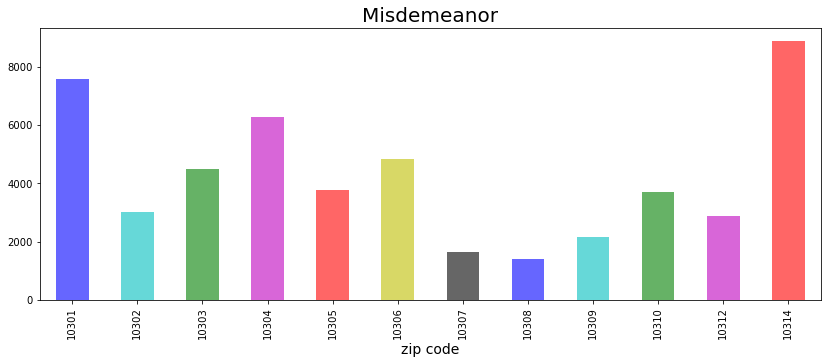

In [18]:
# MISDEMEANOR by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='MISDEMEANOR']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Misdemeanor",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

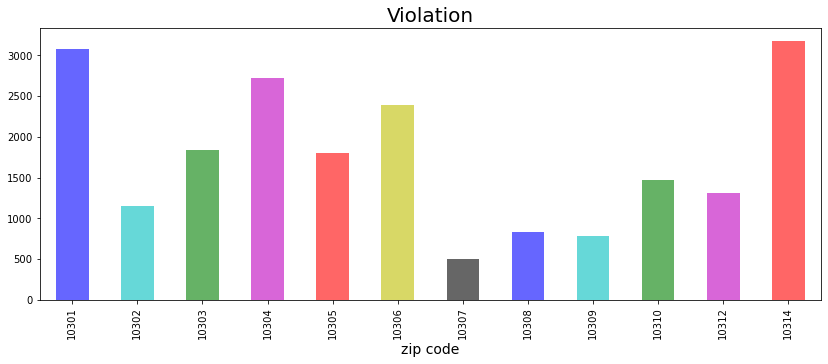

In [19]:
# Violation by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='VIOLATION']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Violation",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

## Make dataframe of "zip"-"law-cat-cd" with averaged lattitude and longitude

- Crosstab Zip & law_cat_cd

In [20]:
ctab_zip_law = pd.crosstab(df['Zip'],df['law_cat_cd'])

# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in island_zip:    # island_zip: zip list of Bronx
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

df_zip_law = pd.DataFrame(dict(ctab_zip_law))
# Add total crime count for each zip code
df_zip_law['Crime'] = df_zip_law['FELONY']+df_zip_law['MISDEMEANOR']+df_zip_law['VIOLATION']

# Add lattitude and longitude of each zip location to dataframe
df_zip_law['zip'] = df_zip_law.index
df_zip_law = df_zip_law.reset_index(drop=True)
df_zip_law['latitude'] = loc_add['latitude']
df_zip_law['longitude'] = loc_add['longitude']
df_zip_law.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude
0,3150,7580,3077,13807,10301,40.637792,-74.085227
1,1501,3031,1158,5690,10302,40.632790,-74.136948
2,2047,4509,1839,8395,10303,40.631216,-74.161290
3,2946,6294,2729,11969,10304,40.616653,-74.083375
4,1813,3762,1799,7374,10305,40.598404,-74.075968


In [21]:
df_zip_law.shape

(12, 7)

In [22]:
# Write to a csv file
df_zip_law.to_csv("df_island_zip_law.csv", index = False)

## Crime count heatmap

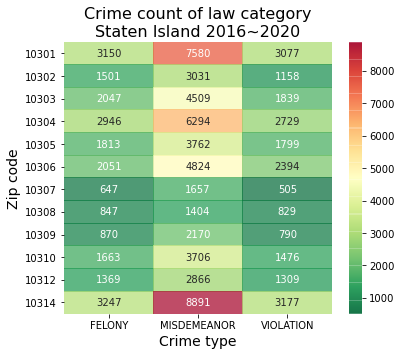

In [23]:
df_select = df_zip_law[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,5))
sns.heatmap(df_select, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count of law category\nStaten Island 2016~2020', fontsize=16)
plt.show()

## Convert frequency to relative percentage of each law category

In [24]:
df_zip_law_pct = df_zip_law.copy()
df_zip_law_pct = df_zip_law_pct.drop('Crime', axis = 1)
df_zip_law_pct['FELONY'] = df_zip_law['FELONY']/df_zip_law['FELONY'].sum()*100
df_zip_law_pct['MISDEMEANOR'] = df_zip_law['MISDEMEANOR']/df_zip_law['MISDEMEANOR'].sum()*100
df_zip_law_pct['VIOLATION'] = df_zip_law['VIOLATION']/df_zip_law['VIOLATION'].sum()*100
df_zip_law_pct['Crime'] = df_zip_law['Crime']/df_zip_law['Crime'].sum()*100

df_zip_law_pct.head(5)

,FELONY,MISDEMEANOR,VIOLATION,zip,latitude,longitude,Crime
0,14.220577,14.952460,14.595389,10301,40.637792,-74.085227,14.699714
1,6.776218,5.979011,5.492837,10302,40.632790,-74.136948,6.057896
2,9.241118,8.894544,8.723081,10303,40.631216,-74.161290,8.937792
3,13.299625,12.415670,12.944692,10304,40.616653,-74.083375,12.742875
4,8.184732,7.420997,8.533346,10305,40.598404,-74.075968,7.850778


In [25]:
# Write to a csv file
df_zip_law_pct.to_csv("df_island_zip_law_pct.csv", index = False)

## Crime ratio heatmap

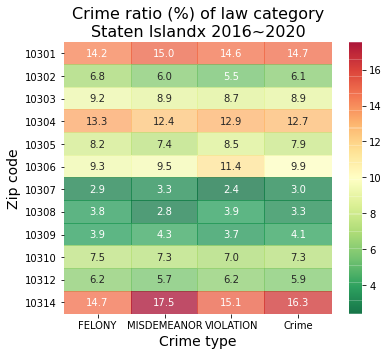

In [26]:
df_select = df_zip_law_pct[['FELONY','MISDEMEANOR','VIOLATION','Crime','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,5))
sns.heatmap(df_select, annot=True, fmt='.1f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) of law category\nStaten Islandx 2016~2020', fontsize=16)
plt.show()

## Crime heatmap on the map

In [27]:
# plot_heatmap(category, data_file)
# prameter
#  category (string): crime category to plot 
#  data_file (dataframe): data to plot 
#     percentage distribution otherwise change colorbar label
def plot_heatmap(category, data_file):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(data_file["longitude"],data_file["latitude"], 
                alpha = 0.8, s=100*data_file[category], marker='o',
                c= data_file[category], cmap='RdYlGn_r')
    title_string = category + ' (Staten Island)'
    plt.title(title_string, fontsize = 20)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)
    cbar = plt.colorbar()
    ny_img = mpimg.imread("NY_Island_map.png")
    plt.imshow(ny_img, extent=[-74.275, -74.045, 40.49, 40.67], alpha=0.4)
    cbar.set_label("Percentage distribution in Zip code area", fontsize=12)
    plt.show()    

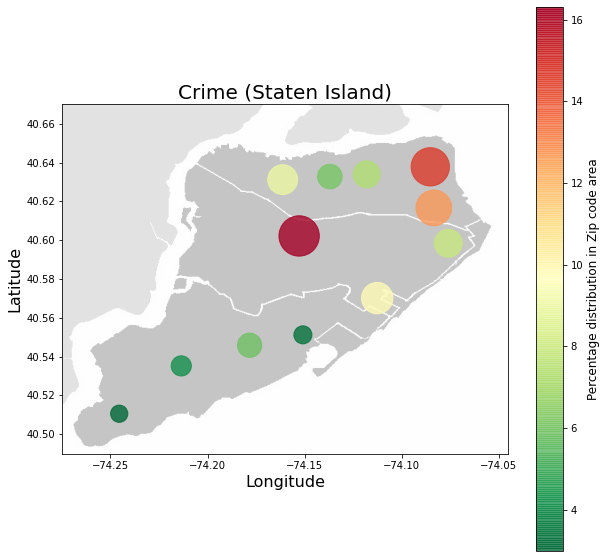

In [28]:
caterory = "Crime"
plot_heatmap(caterory, df_zip_law_pct)

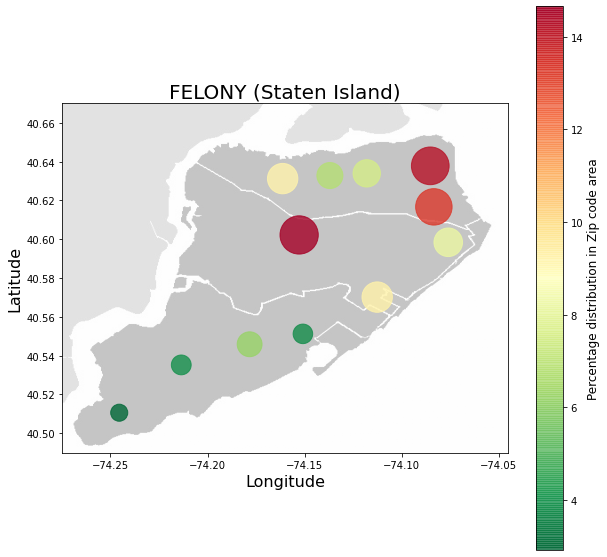

In [29]:
caterory = "FELONY"
plot_heatmap(caterory, df_zip_law_pct)

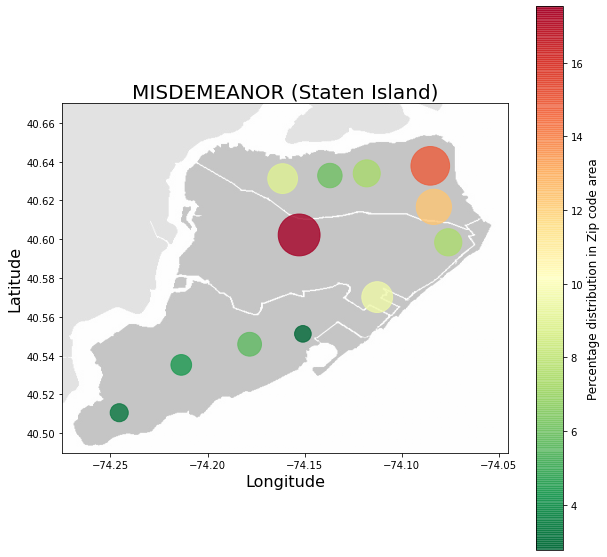

In [30]:
caterory = "MISDEMEANOR"
plot_heatmap(caterory, df_zip_law_pct)

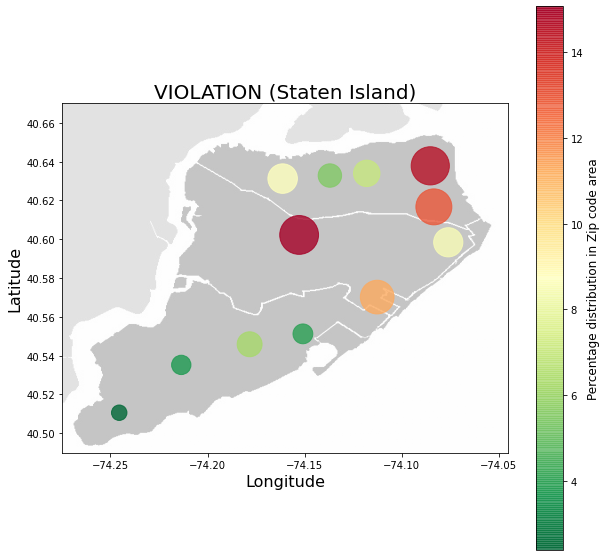

In [31]:
caterory = "VIOLATION"
plot_heatmap(caterory, df_zip_law_pct)

# Crosstab of Offense description and Zip code

In [32]:
# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in island_zip:    # island_zip: zip list of Staten Island
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

In [33]:
ctab_zip_ofns_desc = pd.crosstab(df['Zip'],df['ofns_desc'])

# Add lattitude and longitude of each zip location to dataframe
df_zip_ofns = pd.DataFrame(dict(ctab_zip_ofns_desc))
df_zip_ofns['zip'] = df_zip_ofns.index
df_zip_ofns = df_zip_ofns.reset_index(drop=True)
df_zip_ofns['latitude'] = loc_add['latitude']
df_zip_ofns['longitude'] = loc_add['longitude']
df_zip_ofns.head(5)

,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FRAUDS,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,HARRASSMENT 2,...,MISCELLANEOUS PENAL LAW,OFF. AGNST PUB ORD SENSBLTY &,OFFENSES AGAINST PUBLIC ADMINI,PETIT LARCENY,ROBBERY,SEX CRIMES,THEFT-FRAUD,zip,latitude,longitude
0,1713,249,1864,517,242,526,84,585,134,3065,...,507,811,470,1905,307,425,120,10301,40.637792,-74.085227
1,746,143,671,191,99,269,34,242,63,1147,...,221,290,155,867,226,0,34,10302,40.632790,-74.136948
2,1005,143,1015,220,150,374,81,376,87,1830,...,411,605,254,1186,143,0,57,10303,40.631216,-74.161290
3,1593,250,1657,465,275,504,83,511,146,2718,...,588,686,397,1487,244,0,95,10304,40.616653,-74.083375
4,762,175,1361,156,48,237,100,436,124,1793,...,372,368,71,1018,116,0,64,10305,40.598404,-74.075968


In [34]:
df_zip_ofns.shape

(12, 21)

In [35]:
# Write to a csv file
df_zip_ofns.to_csv("df_island_zip_ofns.csv", index = False)

## Convert frequency to relative percentage of each offense description

In [36]:
col_names = list(df_zip_ofns.keys())
print(col_names)

['ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'FRAUDS', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'PETIT LARCENY', 'ROBBERY', 'SEX CRIMES', 'THEFT-FRAUD', 'zip', 'latitude', 'longitude']


In [37]:
df_zip_ofns_pct = df_zip_ofns.copy()
for index in col_names[:-3]:
    column = df_zip_ofns_pct[index]
    df_zip_ofns_pct[index] = column/column.sum()*100
df_zip_ofns_pct.head()

,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FRAUDS,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,HARRASSMENT 2,...,MISCELLANEOUS PENAL LAW,OFF. AGNST PUB ORD SENSBLTY &,OFFENSES AGAINST PUBLIC ADMINI,PETIT LARCENY,ROBBERY,SEX CRIMES,THEFT-FRAUD,zip,latitude,longitude
0,17.200522,13.459459,14.670235,19.091581,18.250377,17.000646,8.227228,10.910108,12.465116,14.614028,...,13.234143,14.440883,20.907473,12.474625,20.104781,41.585127,10.685663,10301,40.637792,-74.085227
1,7.490712,7.729730,5.280970,7.053176,7.466063,8.694247,3.330069,4.513241,5.860465,5.468936,...,5.768729,5.163818,6.895018,5.677428,14.800262,0.000000,3.027605,10302,40.632790,-74.136948
2,10.091375,7.729730,7.988352,8.124077,11.312217,12.087912,7.933399,7.012309,8.093023,8.725504,...,10.728269,10.772792,11.298932,7.766355,9.364768,0.000000,5.075690,10303,40.631216,-74.161290
3,15.995582,13.513514,13.041083,17.171344,20.739065,16.289593,8.129285,9.530026,13.581395,12.959519,...,15.348473,12.215100,17.660142,9.737411,15.979044,0.000000,8.459484,10304,40.616653,-74.083375
4,7.651371,9.459459,10.711475,5.760709,3.619910,7.659987,9.794319,8.131294,11.534884,8.549087,...,9.710258,6.552707,3.158363,6.666230,7.596595,0.000000,5.699020,10305,40.598404,-74.075968


In [38]:
df_zip_ofns_pct.shape

(12, 21)

In [39]:
# Write to a csv file
df_zip_ofns_pct.to_csv("df_island_zip_ofns_pct.csv", index = False)

In [40]:
col_names[-3]

'zip'

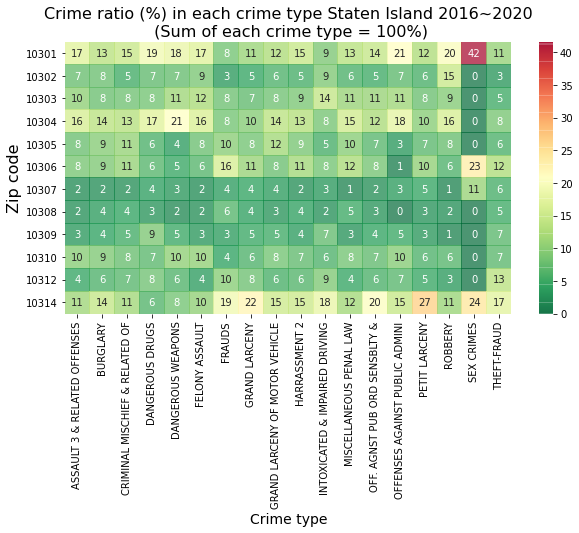

In [41]:
df2_plot = df_zip_ofns_pct[[x for x in col_names[0:-2]]]
df2_plot = df2_plot.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(10,5))
sns.heatmap(df2_plot, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=16)
plt.title('Crime ratio (%) in each crime type Staten Island 2016~2020\n (Sum of each crime type = 100%)', fontsize=16)
plt.show()

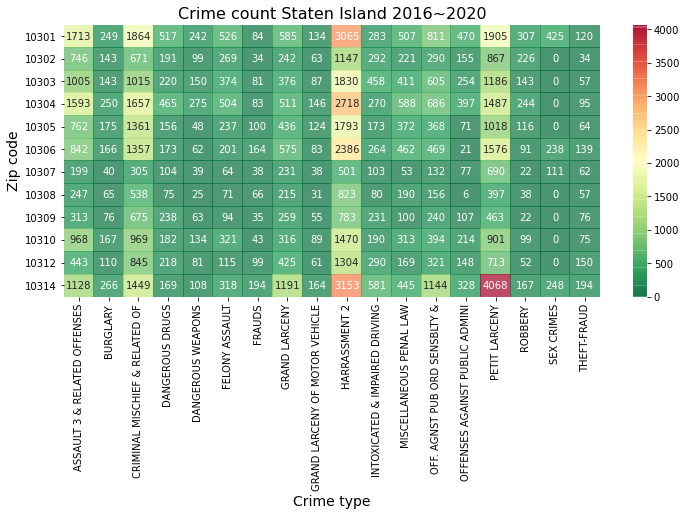

In [42]:
df2_plot2 = df_zip_ofns[[x for x in col_names[0:-2]]]
df2_plot2 = df2_plot2.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(12,5))
sns.heatmap(df2_plot2, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count Staten Island 2016~2020', fontsize=16)
plt.show()

# Plot by crime type

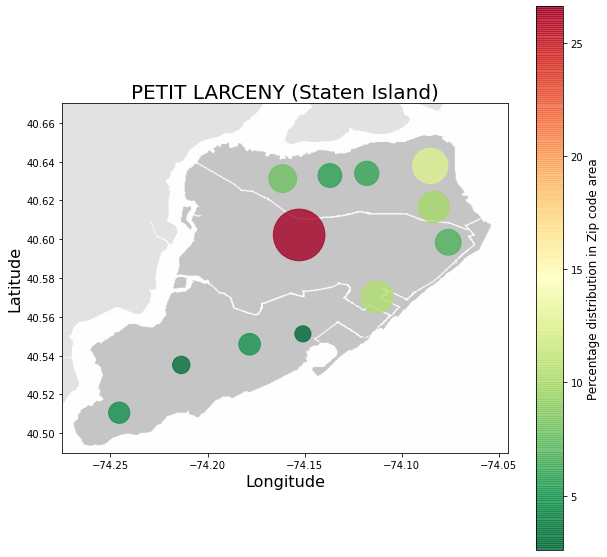

In [43]:
caterory = "PETIT LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

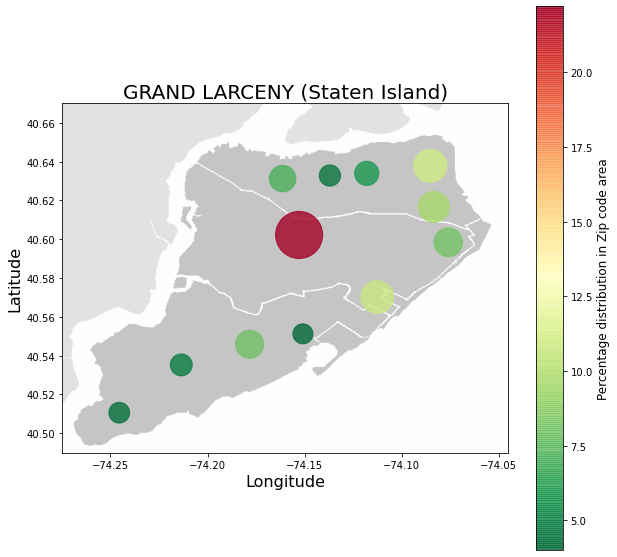

In [44]:
caterory = "GRAND LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

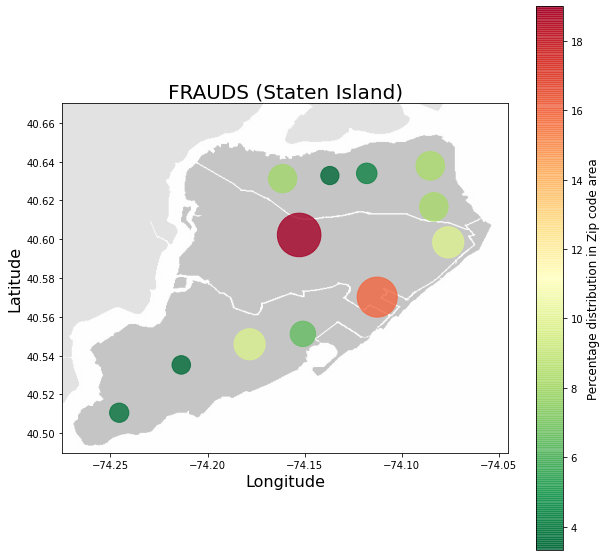

In [45]:
caterory = "FRAUDS"
plot_heatmap(caterory, df_zip_ofns_pct)

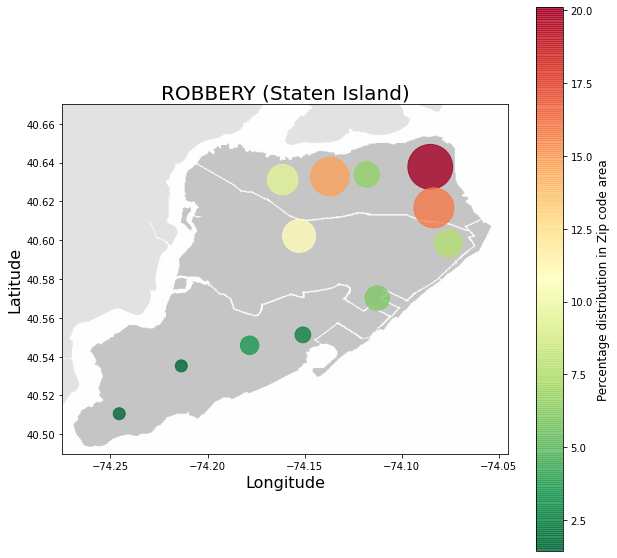

In [46]:
caterory = "ROBBERY"
plot_heatmap(caterory, df_zip_ofns_pct)

In [47]:
#caterory = "RAPE"
#plot_heatmap(caterory, df_zip_ofns_pct)

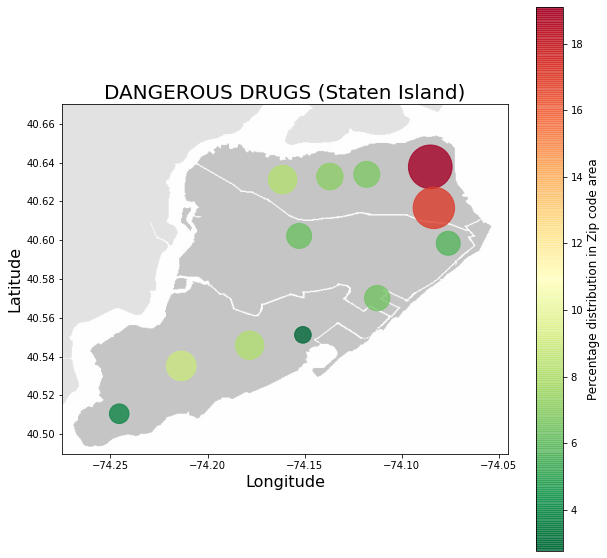

In [48]:
caterory = "DANGEROUS DRUGS"
plot_heatmap(caterory, df_zip_ofns_pct)